In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Load

In [128]:
train_df = pd.read_csv('/jupyter/Data/tabular/train.csv')
test_df = pd.read_csv('/jupyter/Data/tabular/test.csv')
train_df

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


In [129]:
test_df

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat
...,...,...,...,...,...
6565,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat
6566,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker
6567,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug
6568,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat


In [130]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [131]:
train_df['country'].value_counts()
train_df['store'].value_counts()
train_df['product'].value_counts()

Kaggle Mug        8766
Kaggle Hat        8766
Kaggle Sticker    8766
Name: product, dtype: int64

# EDA & FE

## date

In [132]:
def year(date):
    year, month, day = date.split('-')
    return int(year)
def month(date):
    year, month, day = date.split('-')
    return int(month)

In [133]:
train_df['year'] = train_df['date'].apply(year)
train_df['month'] = train_df['date'].apply(month)

test_df['year'] = test_df['date'].apply(year)
test_df['month'] = test_df['date'].apply(month)

train_df

,row_id,date,country,store,product,num_sold,year,month
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1
...,...,...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823,2018,12
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250,2018,12
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004,2018,12
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441,2018,12


In [134]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [75]:
def season(month):
    if month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    elif month in [9,10,11]:
        return 'fall'
    else:
        return 'winter'

In [135]:
train_df['season'] = train_df['month'].apply(season)
test_df['season'] = test_df['month'].apply(season)
train_df.head(3)

,row_id,date,country,store,product,num_sold,year,month,season
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,winter
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,winter
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,winter


In [136]:
import datetime
def weekday(date):
    wd = pd.Timestamp(date)
    return wd.dayofweek

train_df['weekday'] = train_df['date'].apply(weekday)
test_df['weekday'] = test_df['date'].apply(weekday)

In [137]:
train_df

,row_id,date,country,store,product,num_sold,year,month,season,weekday
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,winter,3
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,winter,3
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,winter,3
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,winter,3
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,winter,3
...,...,...,...,...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823,2018,12,winter,0
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250,2018,12,winter,0
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004,2018,12,winter,0
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441,2018,12,winter,0


In [138]:
def is_weekend(weekday):
    if weekday in [5,6]:
        return 1
    else:
        return 0

In [139]:
train_df['is_weekend'] = train_df['weekday'].apply(is_weekend)
test_df['is_weekend'] = test_df['weekday'].apply(is_weekend)

In [140]:
train_df['is_weekend'].value_counts()

0    18774
1     7524
Name: is_weekend, dtype: int64

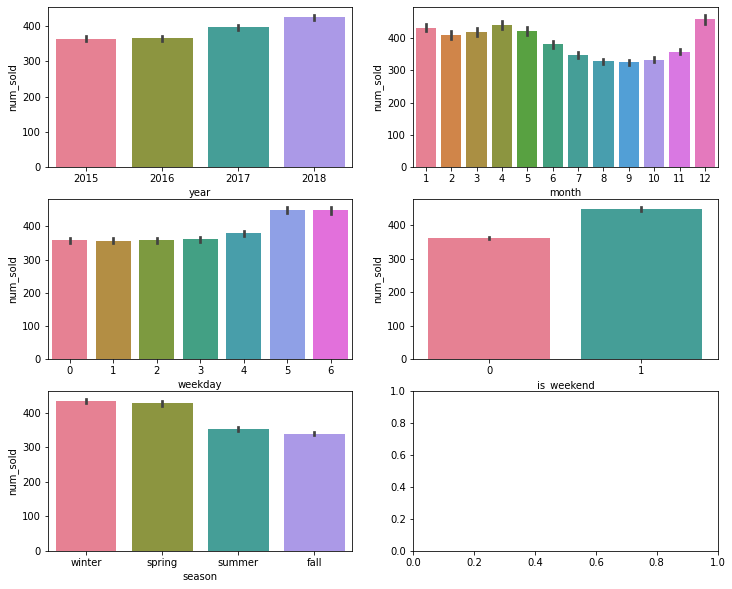

In [141]:
fig, ax = plt.subplots(3, 2, figsize=(12,10))
cols = ['year', 'month', 'weekday', 'is_weekend', 'season']
for i in range(3):
    for j in range(2):
        if i == 2 and j == 1:
            break
        unique = len(train_df[cols[i*2+j]].unique())
        palette = sns.color_palette("husl", unique)
        sns.barplot(x=cols[i*2+j], y='num_sold', data=train_df, ax=ax[i,j], palette=palette)
       

In [142]:
train_df['season_cat'] = train_df['season'].astype('category').cat.codes
test_df['season_cat'] = test_df['season'].astype('category').cat.codes

## store

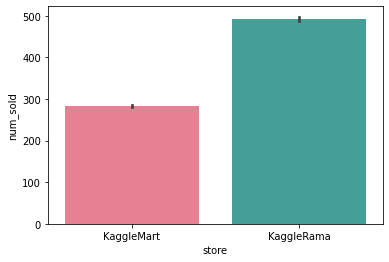

In [143]:
sns.barplot(x='store', y='num_sold', data=train_df, palette=sns.color_palette("husl", 2))
plt.show()

In [144]:
train_df = pd.get_dummies(train_df, columns=['store'], prefix='store')
test_df = pd.get_dummies(test_df, columns=['store'], prefix='store')

## country

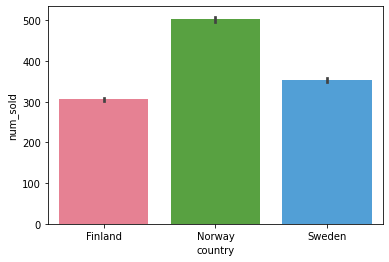

In [145]:
sns.barplot(x='country', y='num_sold', data=train_df, palette=sns.color_palette("husl", 3))
plt.show()

In [146]:
train_df = pd.get_dummies(train_df, columns=['country'], prefix='country')
test_df = pd.get_dummies(test_df, columns=['country'], prefix='country')

## product

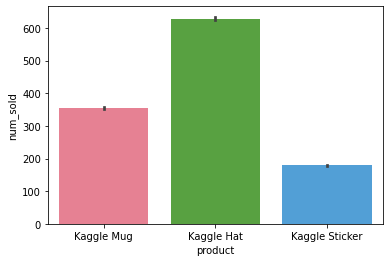

In [148]:
sns.barplot(x='product', y='num_sold', data=train_df, palette=sns.color_palette("husl", 3))
plt.show()

In [149]:
train_df = pd.get_dummies(train_df, columns=['product'], prefix='product')
test_df = pd.get_dummies(test_df, columns=['product'], prefix='product')

In [150]:
train_df.head()

,row_id,date,num_sold,year,month,season,weekday,is_weekend,season_cat,store_KaggleMart,store_KaggleRama,country_Finland,country_Norway,country_Sweden,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,0,2015-01-01,329,2015,1,winter,3,0,3,1,0,1,0,0,0,1,0
1,1,2015-01-01,520,2015,1,winter,3,0,3,1,0,1,0,0,1,0,0
2,2,2015-01-01,146,2015,1,winter,3,0,3,1,0,1,0,0,0,0,1
3,3,2015-01-01,572,2015,1,winter,3,0,3,0,1,1,0,0,0,1,0
4,4,2015-01-01,911,2015,1,winter,3,0,3,0,1,1,0,0,1,0,0


## Model Selection

In [171]:
new_train_df = train_df.drop(['row_id', 'season','date'], axis=1)
new_test_df = test_df.drop(['row_id', 'season', 'date'], axis=1)
new_train_df

,num_sold,year,month,weekday,is_weekend,season_cat,store_KaggleMart,store_KaggleRama,country_Finland,country_Norway,country_Sweden,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,329,2015,1,3,0,3,1,0,1,0,0,0,1,0
1,520,2015,1,3,0,3,1,0,1,0,0,1,0,0
2,146,2015,1,3,0,3,1,0,1,0,0,0,0,1
3,572,2015,1,3,0,3,0,1,1,0,0,0,1,0
4,911,2015,1,3,0,3,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26293,823,2018,12,0,0,3,1,0,0,0,1,1,0,0
26294,250,2018,12,0,0,3,1,0,0,0,1,0,0,1
26295,1004,2018,12,0,0,3,0,1,0,0,1,0,1,0
26296,1441,2018,12,0,0,3,0,1,0,0,1,1,0,0


In [166]:
data = new_train_df.drop('num_sold', axis=1)
target = new_train_df['num_sold']

In [211]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [183]:
from sklearn.preprocessing import RobustScaler

#데이터 스케일링
rbst_scaler = RobustScaler() #이상치의 영향을 줄이기 위해 평균값 대신 중앙값을 사용하는 RobustScaler사용
train_scaled = rbst_scaler.fit_transform(data)
test_scaled = rbst_scaler.fit_transform(new_test_df)

In [184]:
rf = RandomForestRegressor(random_state=0)
mse= -cross_val_score(rf, train_scaled, target, cv=k_fold, scoring='neg_mean_squared_error', ).mean()
rmse=np.sqrt(mse)
rmse

88.85687287501582

In [181]:
xgb = XGBRegressor(random_state=0)
mse= -cross_val_score(xgb, train_scaled, target, cv=k_fold, scoring='neg_mean_squared_error', ).mean()
rmse = np.sqrt(mse)
rmse

78.73607381826707

In [187]:
lasso = Lasso(random_state=0)
mse= -cross_val_score(lasso, train_scaled, target, cv=k_fold, scoring='neg_mean_squared_error', ).mean()
rmse = np.sqrt(mse)
rmse

125.60914059725678

In [188]:
elastic = ElasticNet(random_state=0)
mse= -cross_val_score(elastic, train_scaled, target, cv=k_fold, scoring='neg_mean_squared_error', ).mean()
rmse = np.sqrt(mse)
rmse

185.06787667919858

In [196]:
lgbm = LGBMRegressor(random_state=0)
mse= -cross_val_score(lgbm, train_scaled, target, cv=k_fold, scoring='neg_mean_squared_error', ).mean()
rmse = np.sqrt(mse)
rmse

75.26152590139367

In [212]:
gbr = GradientBoostingRegressor(random_state=0)
mse= -cross_val_score(gbr, train_scaled, target, cv=k_fold, scoring='neg_mean_squared_error', ).mean()
rmse = np.sqrt(mse)
rmse

77.5842586761983

In [189]:
xgb.fit(train_scaled, target)
prediction = xgb.predict(test_scaled)

In [193]:
submission = pd.DataFrame()
submission['row_id'] = test_df['row_id']
submission['num_sold'] = prediction

In [195]:
submission.to_csv('submission1.csv', index=False)

In [203]:
#XGBoost 파라미터 튜닝
XGB = XGBRegressor(objective='reg:squarederror')
xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}
gsXGB = GridSearchCV(XGB, param_grid = xgb_param_grid, cv = k_fold, scoring='neg_mean_squared_error', verbose = 1)
gsXGB.fit(train_scaled, target)
XGB_best = gsXGB.best_estimator_

gsXGB.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


-5346.522088192435

In [205]:
gsXGB.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}

In [207]:
#LGBM 파라미터 튜닝
LGB = LGBMRegressor()
lgb_param_grid = {
    'num_leaves' : [1,5,10],
    'learning_rate': [1,0.1,0.01,0.001],
    'n_estimators': [50, 100, 200, 500, 1000,5000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}
gsLGB = GridSearchCV(LGB, param_grid = lgb_param_grid, cv=k_fold, scoring = 'neg_mean_squared_error', verbose=1)
gsLGB.fit(train_scaled, target)
LGB_best = gsLGB.best_estimator_

gsLGB.best_score_

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


-5717.913584769754

In [209]:
gsLGB.best_params_

{'learning_rate': 0.01,
 'max_depth': 15,
 'min_split_gain': 0.3,
 'n_estimators': 500,
 'num_leaves': 50}

In [213]:
#GradientBoosting 파라미터 튜닝
gbr = GradientBoostingRegressor()
gb_param_grid = {'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBR = GridSearchCV(gbr, param_grid = gb_param_grid, cv = k_fold, scoring = 'neg_mean_squared_error', verbose = 1)
gsGBR.fit(train_scaled, target)
GBR_best = gsGBR.best_estimator_

gsGBR.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


-5385.694100694289

In [214]:
gsGBR.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 0.3,
 'min_samples_leaf': 150,
 'n_estimators': 300}

In [216]:
XGB = XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=3, n_estimators=1000 )
XGB.fit(train_scaled, target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [217]:
prediction = XGB.predict(test_scaled)
submission = pd.DataFrame()
submission['row_id'] = test_df['row_id']
submission['num_sold'] = prediction
submission.to_csv('submission2.csv', index=False)

## Stacking

In [220]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression

In [221]:
params = {'meta_regressor__C': [0.1, 1.0, 10.0, 100.0], 'use_features_in_secondary' : [True, False]}
rgs1 = XGB_best
rgs2 = LGB_best
rgs3 = GBR_best

lr = LogisticRegression()
st_re = StackingRegressor(regressors = [rgs1, rgs2, rgs3], meta_regressor = RandomForestRegressor())
st_mod = st_re.fit(train_scaled, target)
st_pred = st_mod.predict(test_scaled)

In [222]:
submission = pd.DataFrame()
submission['row_id'] = test_df['row_id']
submission['num_sold'] = st_pred
submission.to_csv('submission3.csv', index=False)